# TP5 : Classification automatique

## Classificaton hiérarchique

### Données mutations

In [62]:
mutations = read.csv('donnees//mutations2.csv', header = T, row.names = 1)
head(mutations)

Man Monkey Dog Horse Donkey Pig Rabbit Kangaroo Pekin.Duck Pigeon
Man     0   1     13  17    16     13  12     12       17         16    
Monkey  1   0     12  16    15     12  11     13       16         15    
Dog    13  12      0  10     8      4   6      7       12         12    
Horse  17  16     10   0     1      5  11     11       16         16    
Donkey 16  15      8   1     0      4  10     12       15         15    
Pig    13  12      4   5     4      0   6      7       13         13    
       Chicken King.Penguin Snapping.Turtle Rattlesnake Tuna Screwworm.Fly Moth
Man    18      18           19              20          31   33            36  
Monkey 17      17           18              21          32   32            35  
Dog    14      14           13              30          29   24            28  
Horse  16      17           16              32          27   24            33  
Donkey 15      16           15              31          26   25            32  
Pig    13      14           13              30          25   26            31  
       Bakers.Mould Bread.Yeast Skin.Fungus
Man    63           56          66         
Monkey 62           57          65         
Dog    64           61          66         
Horse  64           60          68         
Donkey 64           59          67         
Pig    64           59          67

In [20]:
mut.ward = hclust(dist(mutations), method = "ward.D2")
mut.average = hclust(dist(mutations), method = "average")
mut.complete = hclust(dist(mutations), method = "complete")
mut.centroid = hclust(dist(mutations), method = "centroid")

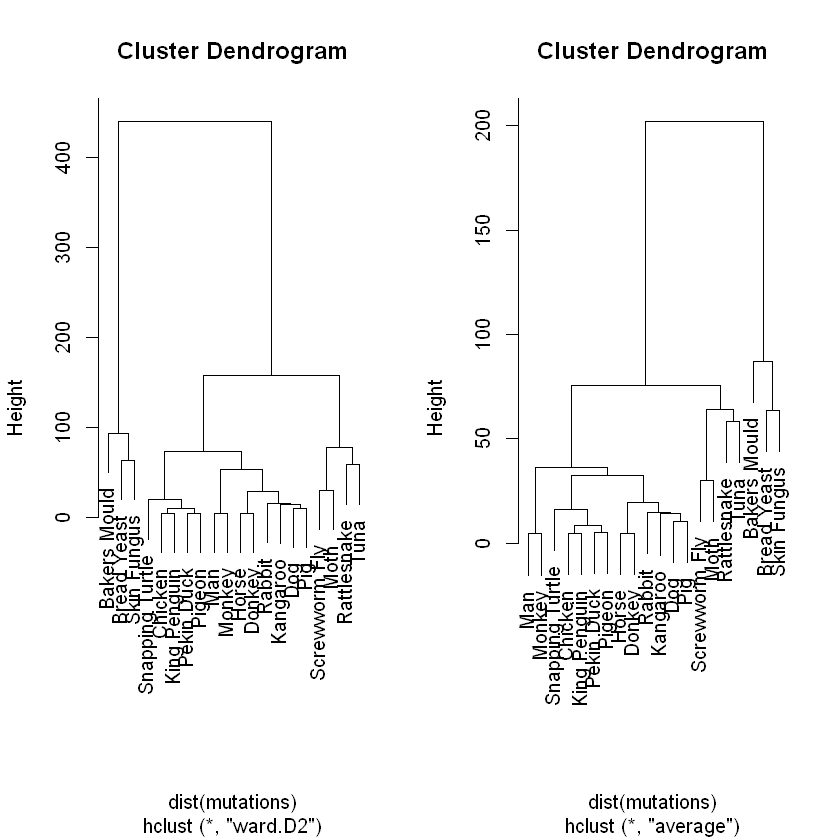

In [75]:
par(mfrow = c(1,2))
plot(mut.ward)
plot(mut.average)

Les dendrogrammes sont un peu différent en fonction de la méthode d classification employée.

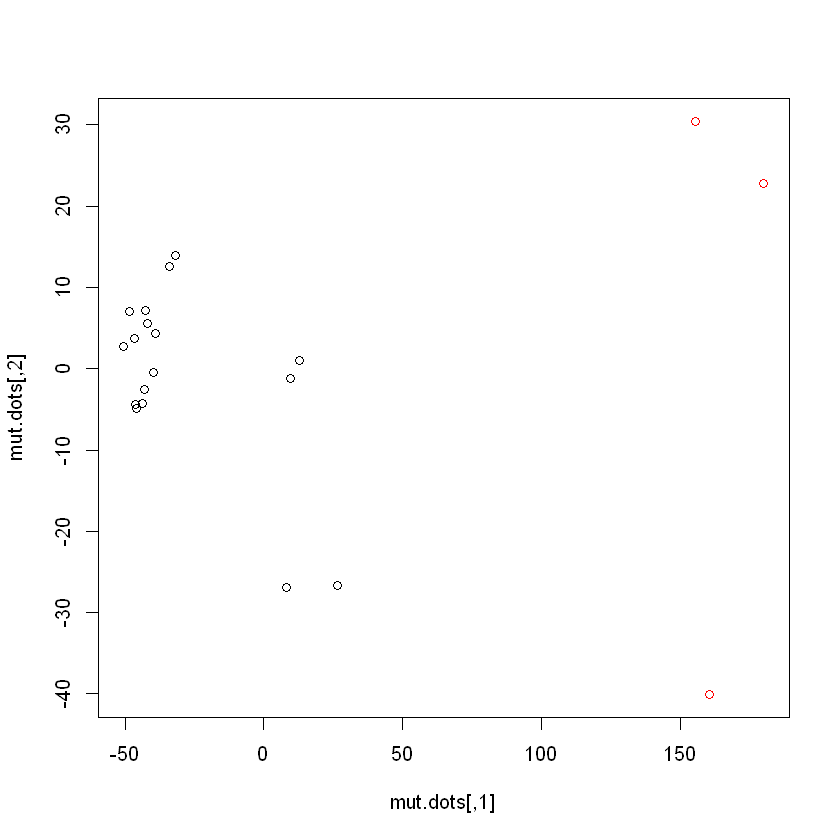

In [48]:
mut.dots = cmdscale(dist(mutations))
mut.groups = cutree(mut.ward, k=2)
plot(mut.dots, col = mut.groups)

### Données Iris

In [61]:
head(iris)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
5 5.0          3.6         1.4          0.2         setosa 
6 5.4          3.9         1.7          0.4         setosa

#### Classification ascendante

In [113]:
iris.points = iris.pca$x[,1:2]

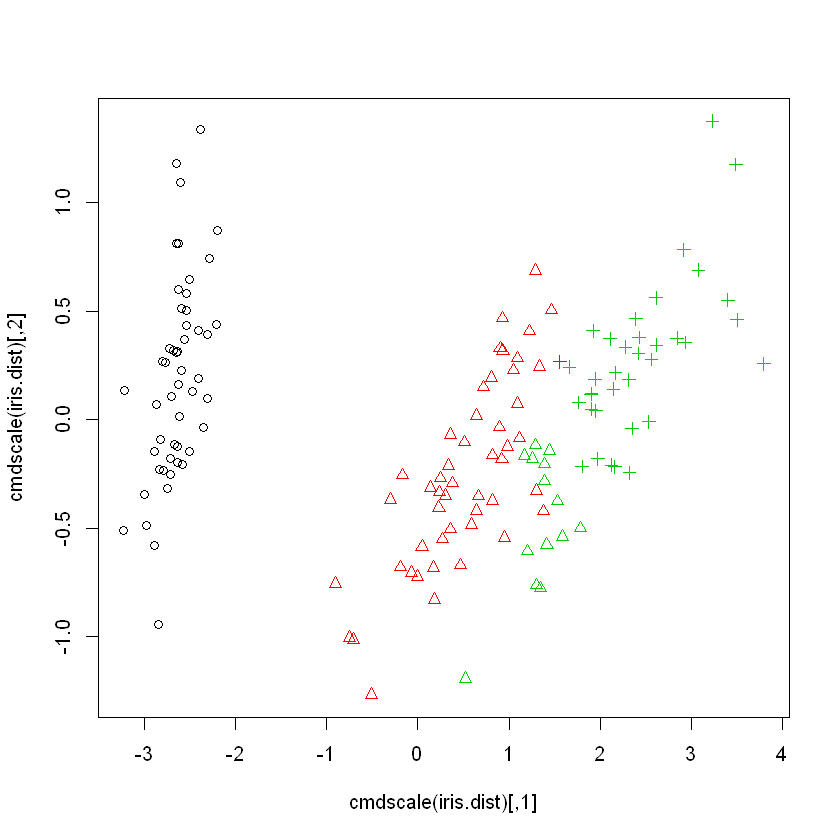

In [74]:
# on ne veut pas la colonne espece
iris.dist = dist(iris[,-5])
iris.hclust = hclust(iris.dist, method = 'ward.D2')
# on sait qu'on devrait avoir 3 especes
iris.groups = cutree(iris.hclust, k = 3)
plot(cmdscale(iris.dist), pch = iris.groups, col = iris$Species)

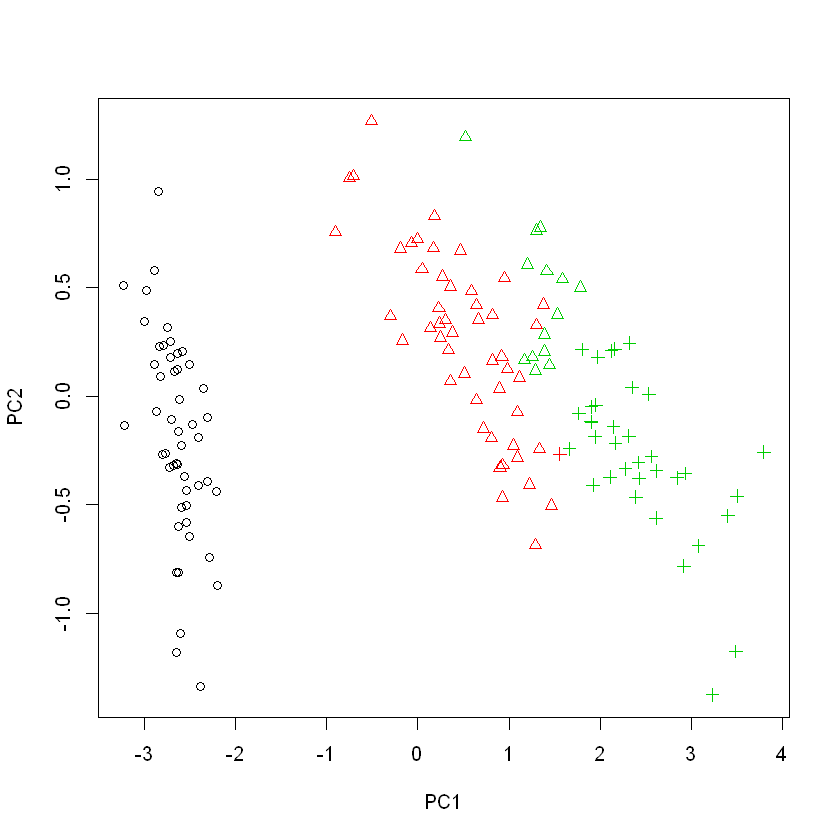

In [73]:
iris.pca = prcomp(iris[,-5])
plot(iris.points, pch = iris.groups, col = iris$Species)

#### Classification descendante

In [77]:
library(cluster)

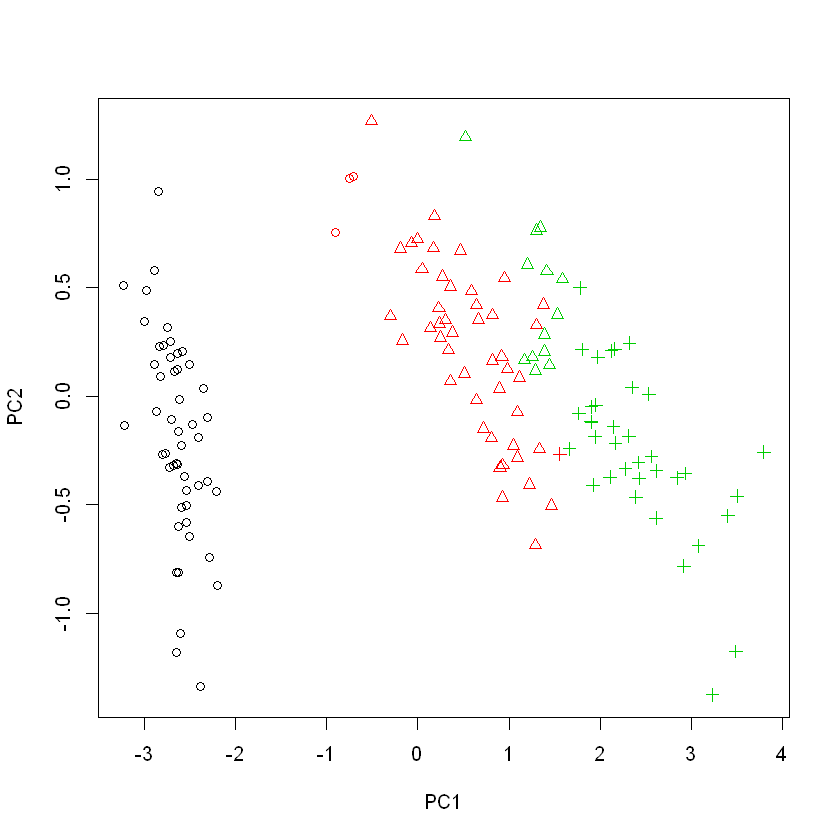

In [87]:
iris.diana = diana(iris[,-5], diss = F)
iris.diana.groups = cutree(iris.diana, k = 3)
plot(iris.points, pch = iris.diana.groups, col = iris$Species)

In [91]:
library(mclust)

On peut comparer avec Species (la vérité !)

In [95]:
adjustedRandIndex(iris.groups, iris$Species)

[1] 0.7311986

In [96]:
adjustedRandIndex(iris.diana.groups, iris$Species)

[1] 0.6946067

On peut aussi comparer les hiérarchies obtenues:

In [94]:
adjustedRandIndex(iris.groups, iris.diana.groups)

[1] 0.9149261

## K-means

### Données Iris

In [110]:
iris.k2 = kmeans(iris[,-5], centers = 2)
iris.k3 = kmeans(iris[,-5], centers = 3)
iris.k4 = kmeans(iris[,-5], centers = 4)

iris.k3

K-means clustering with 3 clusters of sizes 38, 50, 62

Cluster means:
  Sepal.Length Sepal.Width Petal.Length Petal.Width
1     6.850000    3.073684     5.742105    2.071053
2     5.006000    3.428000     1.462000    0.246000
3     5.901613    2.748387     4.393548    1.433871

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 [75] 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 1 1 1 1 3 1 1 1 1
[112] 1 1 3 3 1 1 1 1 3 1 3 1 3 1 1 3 3 1 1 1 1 1 3 1 1 1 1 3 1 1 1 3 1 1 1 3 1
[149] 1 3

Within cluster sum of squares by cluster:
[1] 23.87947 15.15100 39.82097
 (between_SS / total_SS =  88.4 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

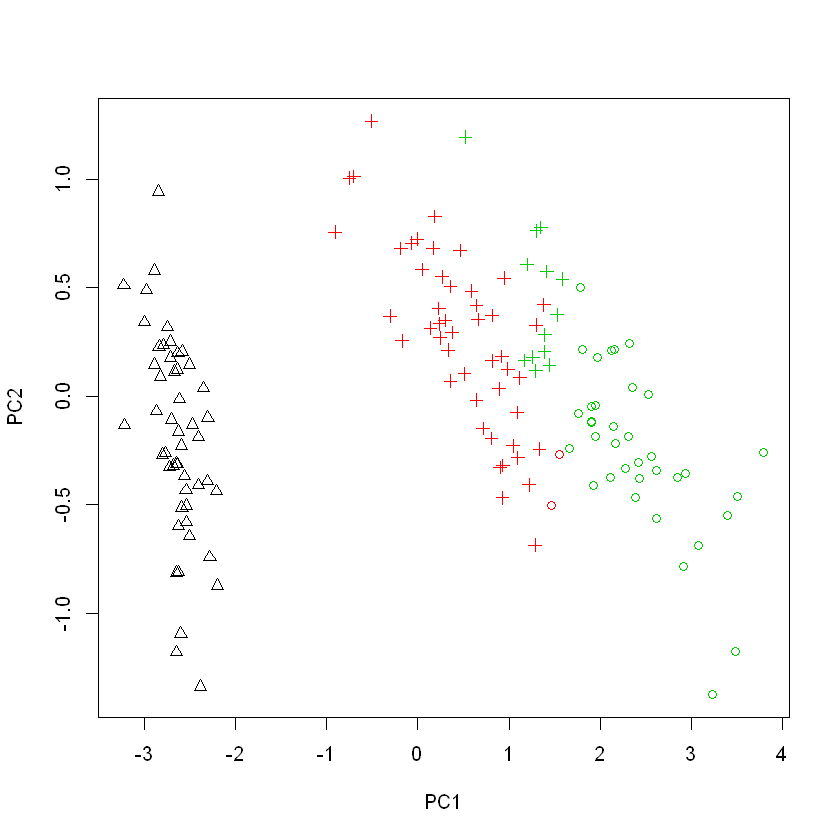

In [115]:
plot(iris.points, pch = iris.k3$cluster, col = iris$Species)

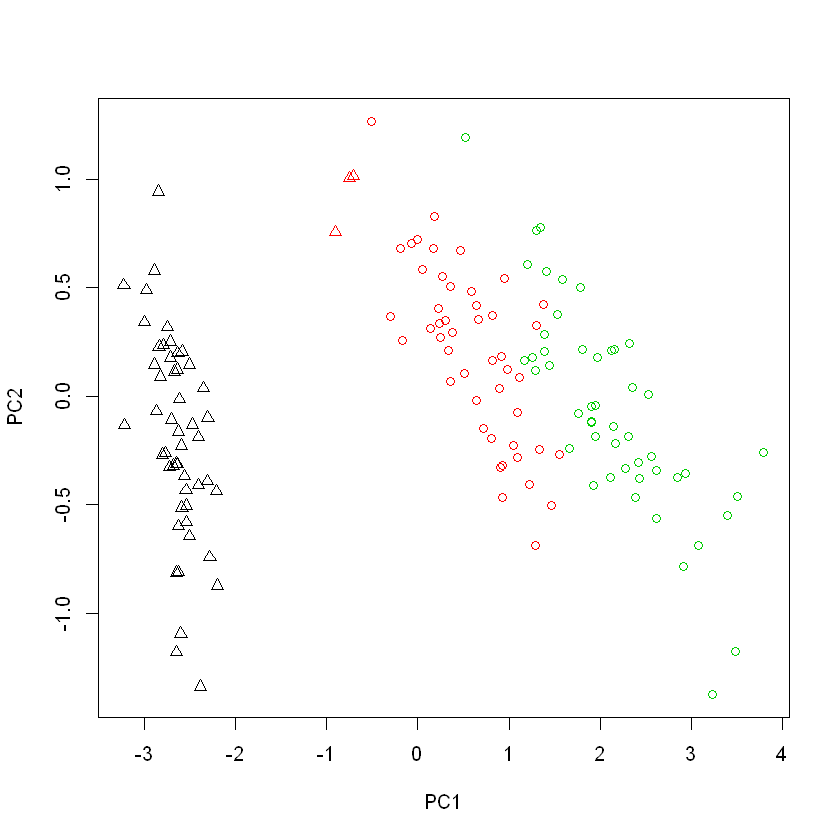

In [116]:
plot(iris.points, pch = iris.k2$cluster, col = iris$Species)

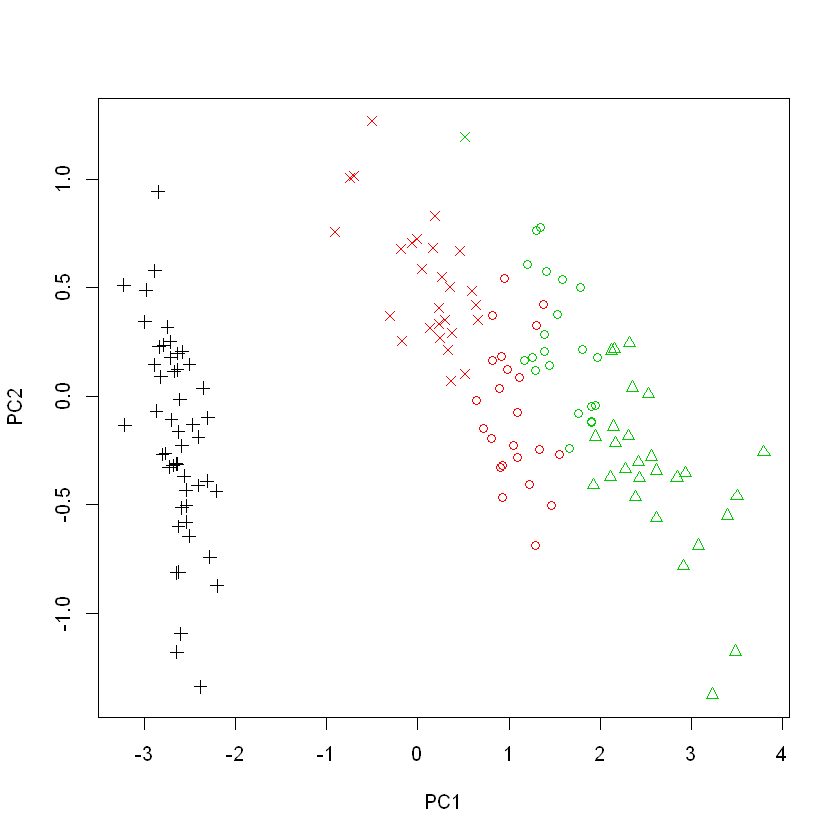

In [117]:
plot(iris.points, pch = iris.k4$cluster, col = iris$Species)

Kmeans ne donne pas toujours le meme resultat ! Run plusieurs fois :)

In [154]:
iris.k3bis = kmeans(iris[,-5], centers = 3)
adjustedRandIndex(iris.k3$cluster, iris.k3bis$cluster)

[1] 0.4423085

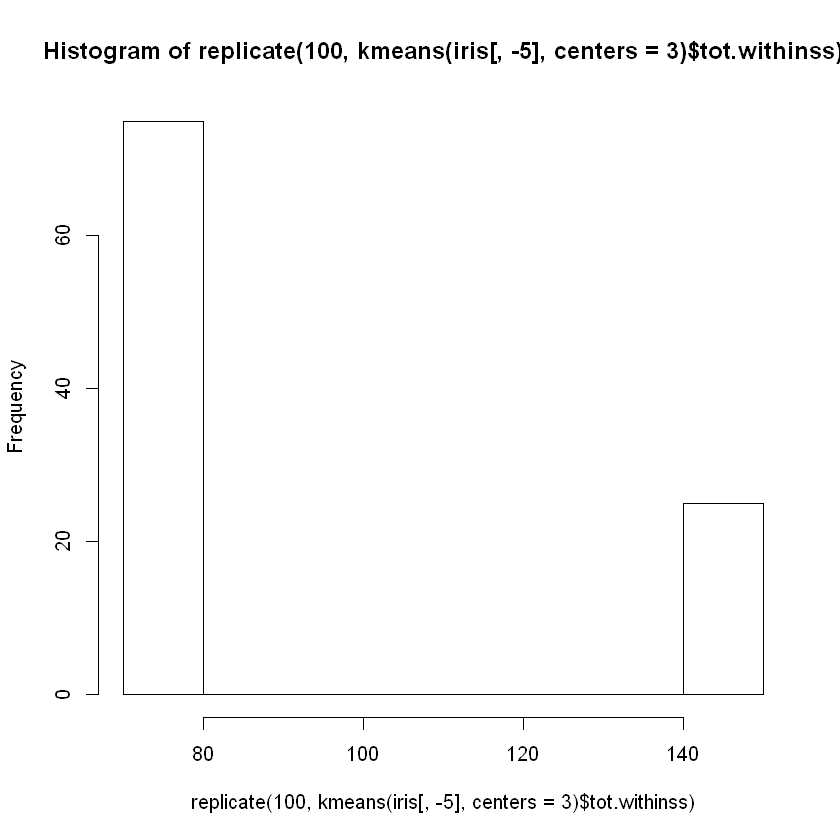

In [156]:
hist(replicate(100,kmeans(iris[,-5], centers = 3)$tot.withinss))

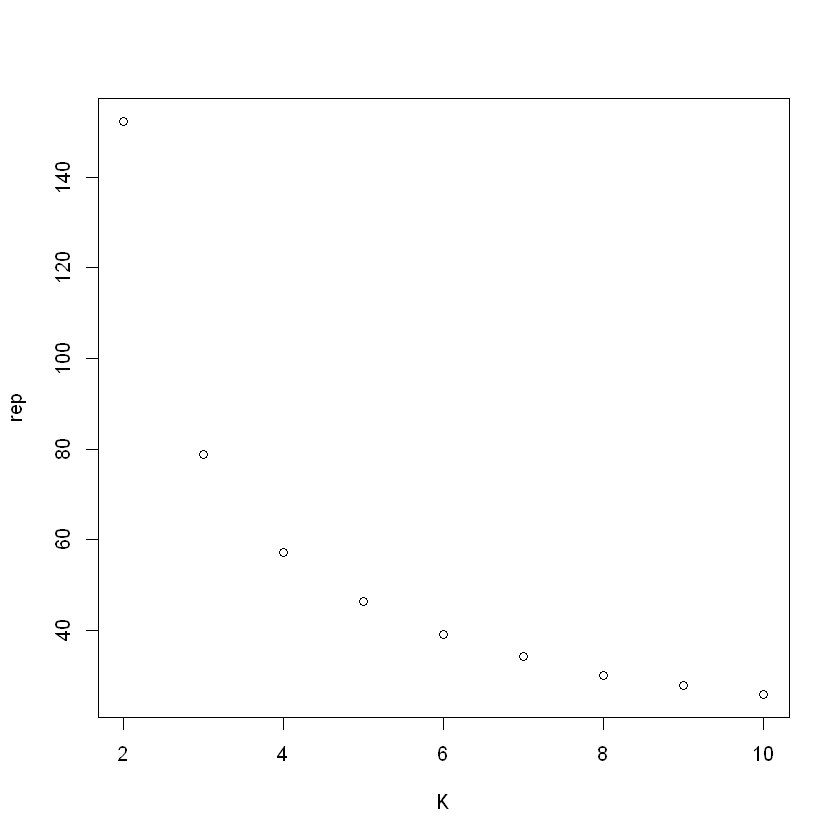

In [169]:
K = 2:10
rep = c()
for(k in K){
    rep = c(rep,kmeans(iris[,-5], centers = k, nstart=100)$tot.withinss)
}
plot(K, rep)
    

Méthode du coude: visiblement, k=4 colle mieux aux données.

### Données Crabs